# Exploratory Data Analysis

In [145]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Q-Q Plot
import scipy.stats as stats

# Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

In [146]:
# reading dataset
wine = pd.read_excel("Red_wine_.xlsx")
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0


In [147]:
# getting last 10 rows of dataset
wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.52,0.54,9.2,5.0
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.52,0.82,11.6,6.0
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.52,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [148]:
# dimensions of dataset
wine.shape

(1599, 12)

In [149]:
# additional information
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [150]:
# checking for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [151]:
# dropping null values
wine = wine.dropna()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [152]:
# rechecking for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [153]:
# dimensions of dataset after dropping null values
wine.shape

(1596, 12)

In [154]:
# getting unique vqlue for "quality" feature
wine.quality.unique()

array([5., 6., 7., 4., 8., 3.])

In [155]:
# getting count of records for each unique value of quality feature
wine.quality.value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [156]:
# statistical information
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


# Data Visualization

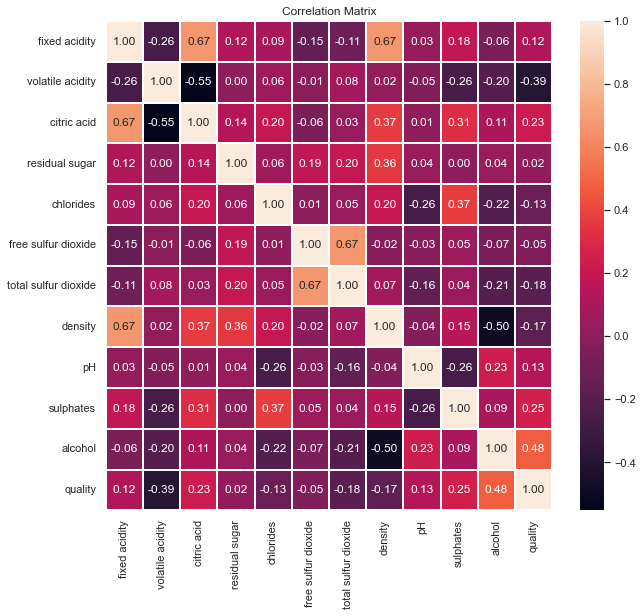

In [157]:
# creating correlation map to visualize correlation among features
wine.corr()
plt.figure(figsize=(10,9))
sns.heatmap(wine.corr(),annot = True, linewidths=1.5 , fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [158]:
# getting list of numerical features
numerical_features=[feature for feature in wine.columns if wine[feature].dtypes!='O']
print(numerical_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [159]:
# getting count of unique value in each feature
for feature in numerical_features:
  print("'{}' has '{}' No. of unique values".format(feature, wine[feature].nunique()))

'fixed acidity' has '96' No. of unique values
'volatile acidity' has '143' No. of unique values
'citric acid' has '80' No. of unique values
'residual sugar' has '91' No. of unique values
'chlorides' has '153' No. of unique values
'free sulfur dioxide' has '60' No. of unique values
'total sulfur dioxide' has '144' No. of unique values
'density' has '436' No. of unique values
'pH' has '55' No. of unique values
'sulphates' has '96' No. of unique values
'alcohol' has '65' No. of unique values
'quality' has '6' No. of unique values


In [160]:
# getting list of continuous features
continuous_features=[feature for feature in numerical_features if wine[feature].nunique()>6]
print(continuous_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<AxesSubplot:xlabel='quality', ylabel='count'>

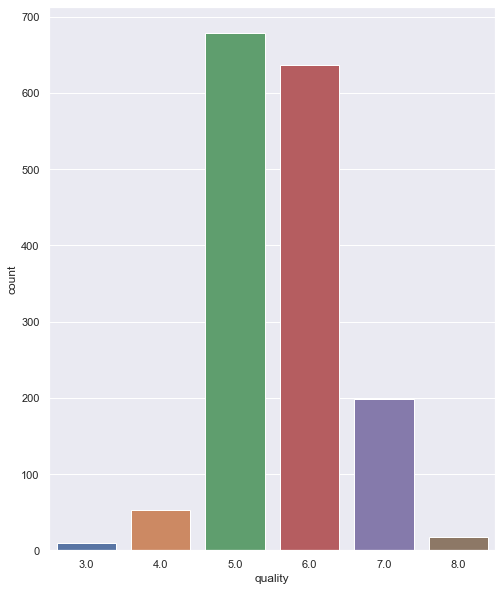

In [161]:
# visualising count of quality feature
sns.countplot(data = wine, x='quality')

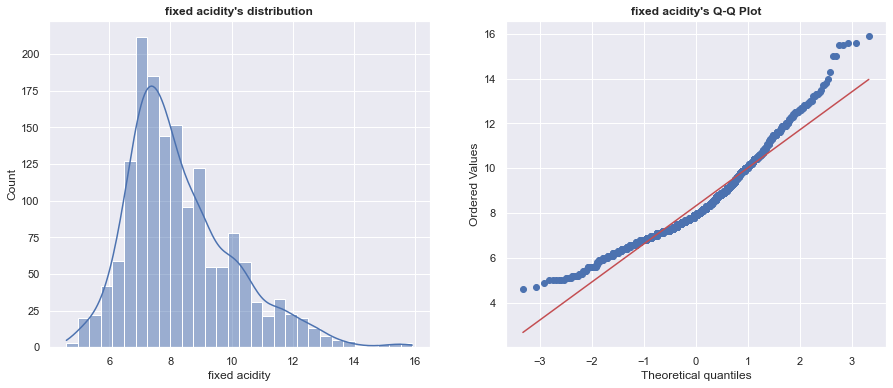

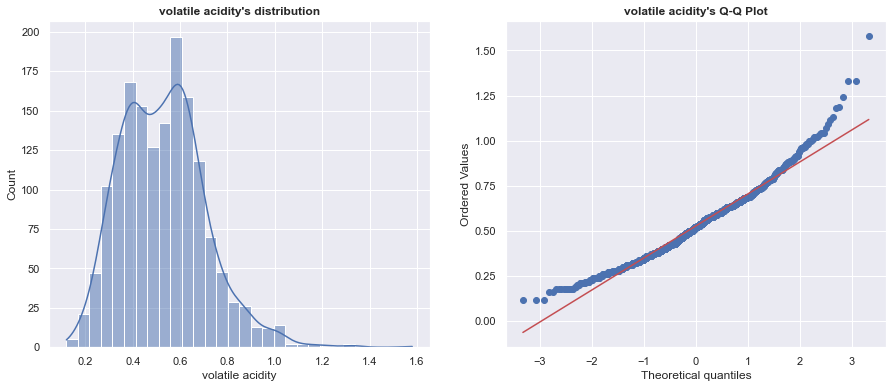

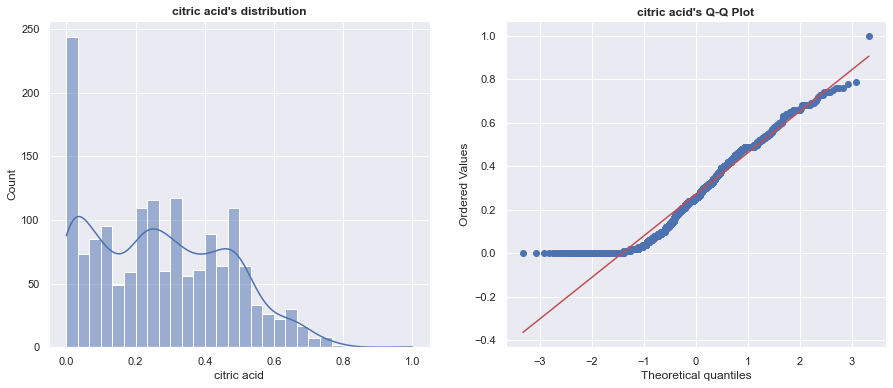

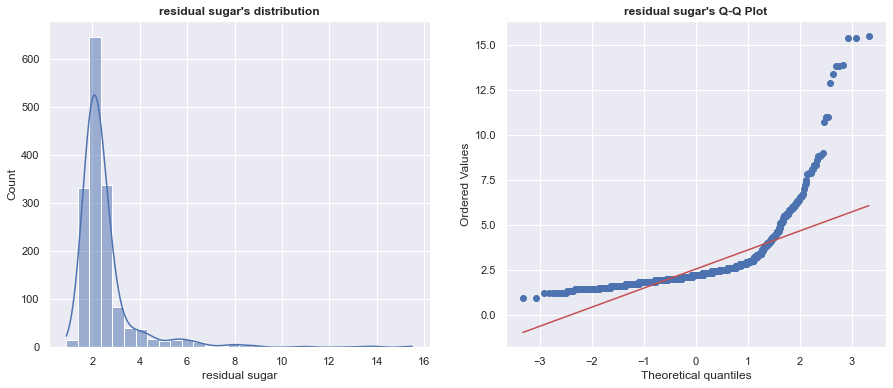

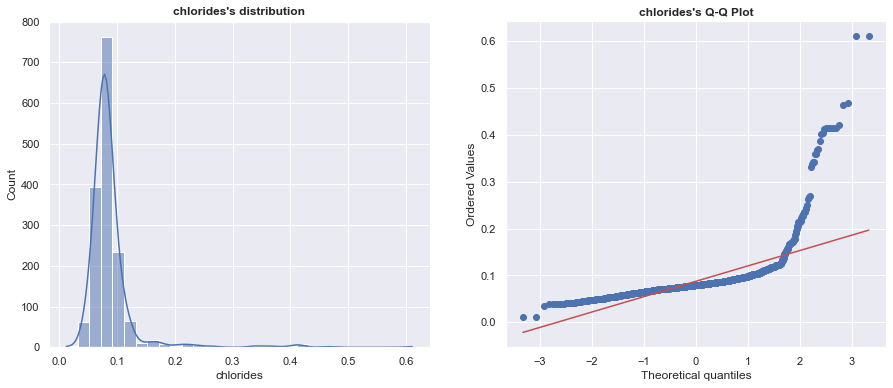

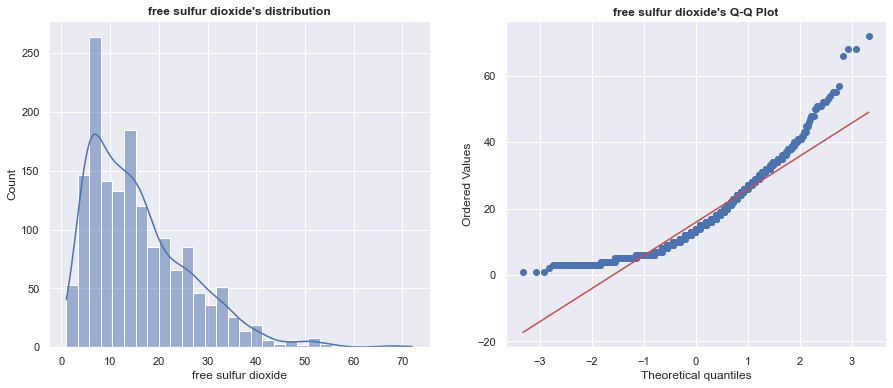

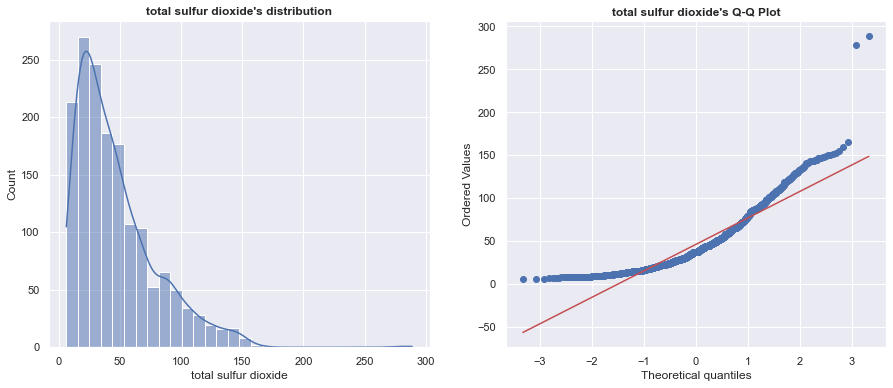

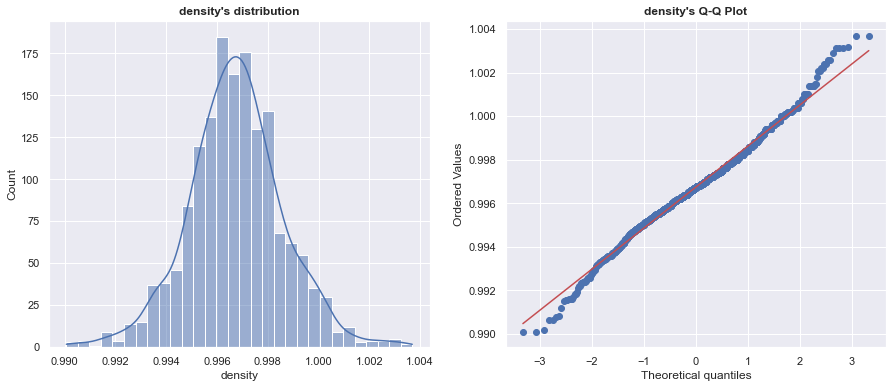

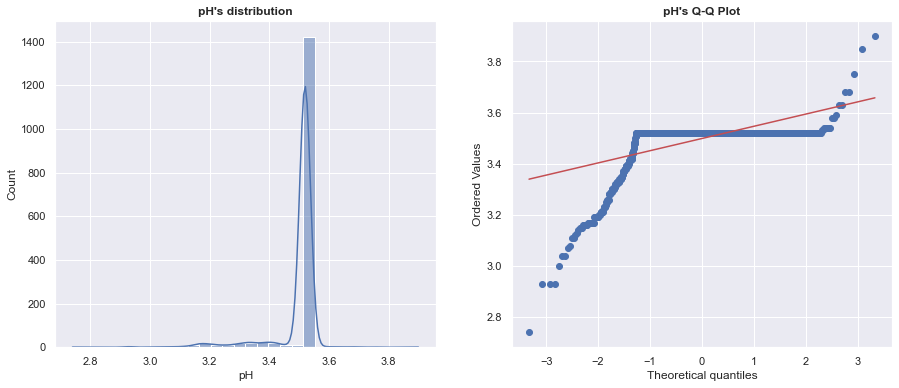

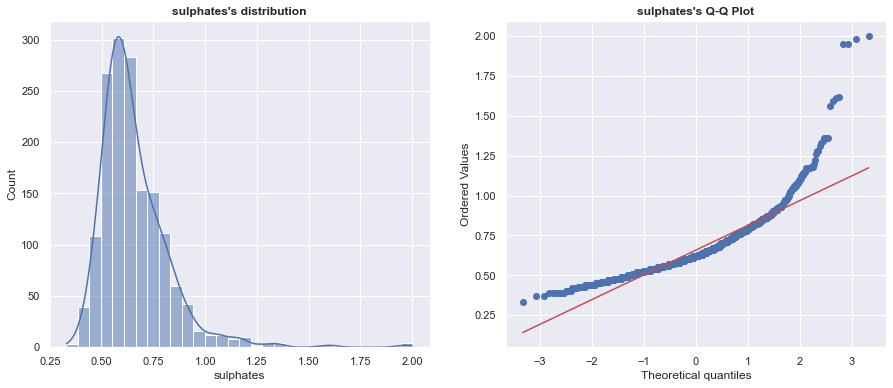

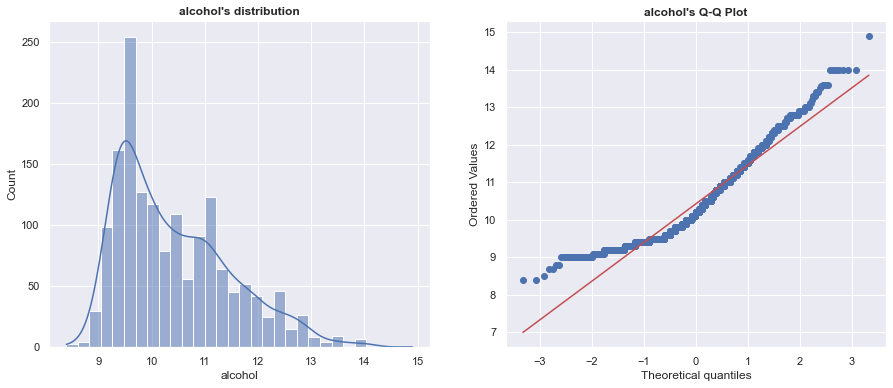

In [162]:
# Checking distribution of Continuous numerical features
for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=wine, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    plt.subplot(122)
    stats.probplot(wine[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

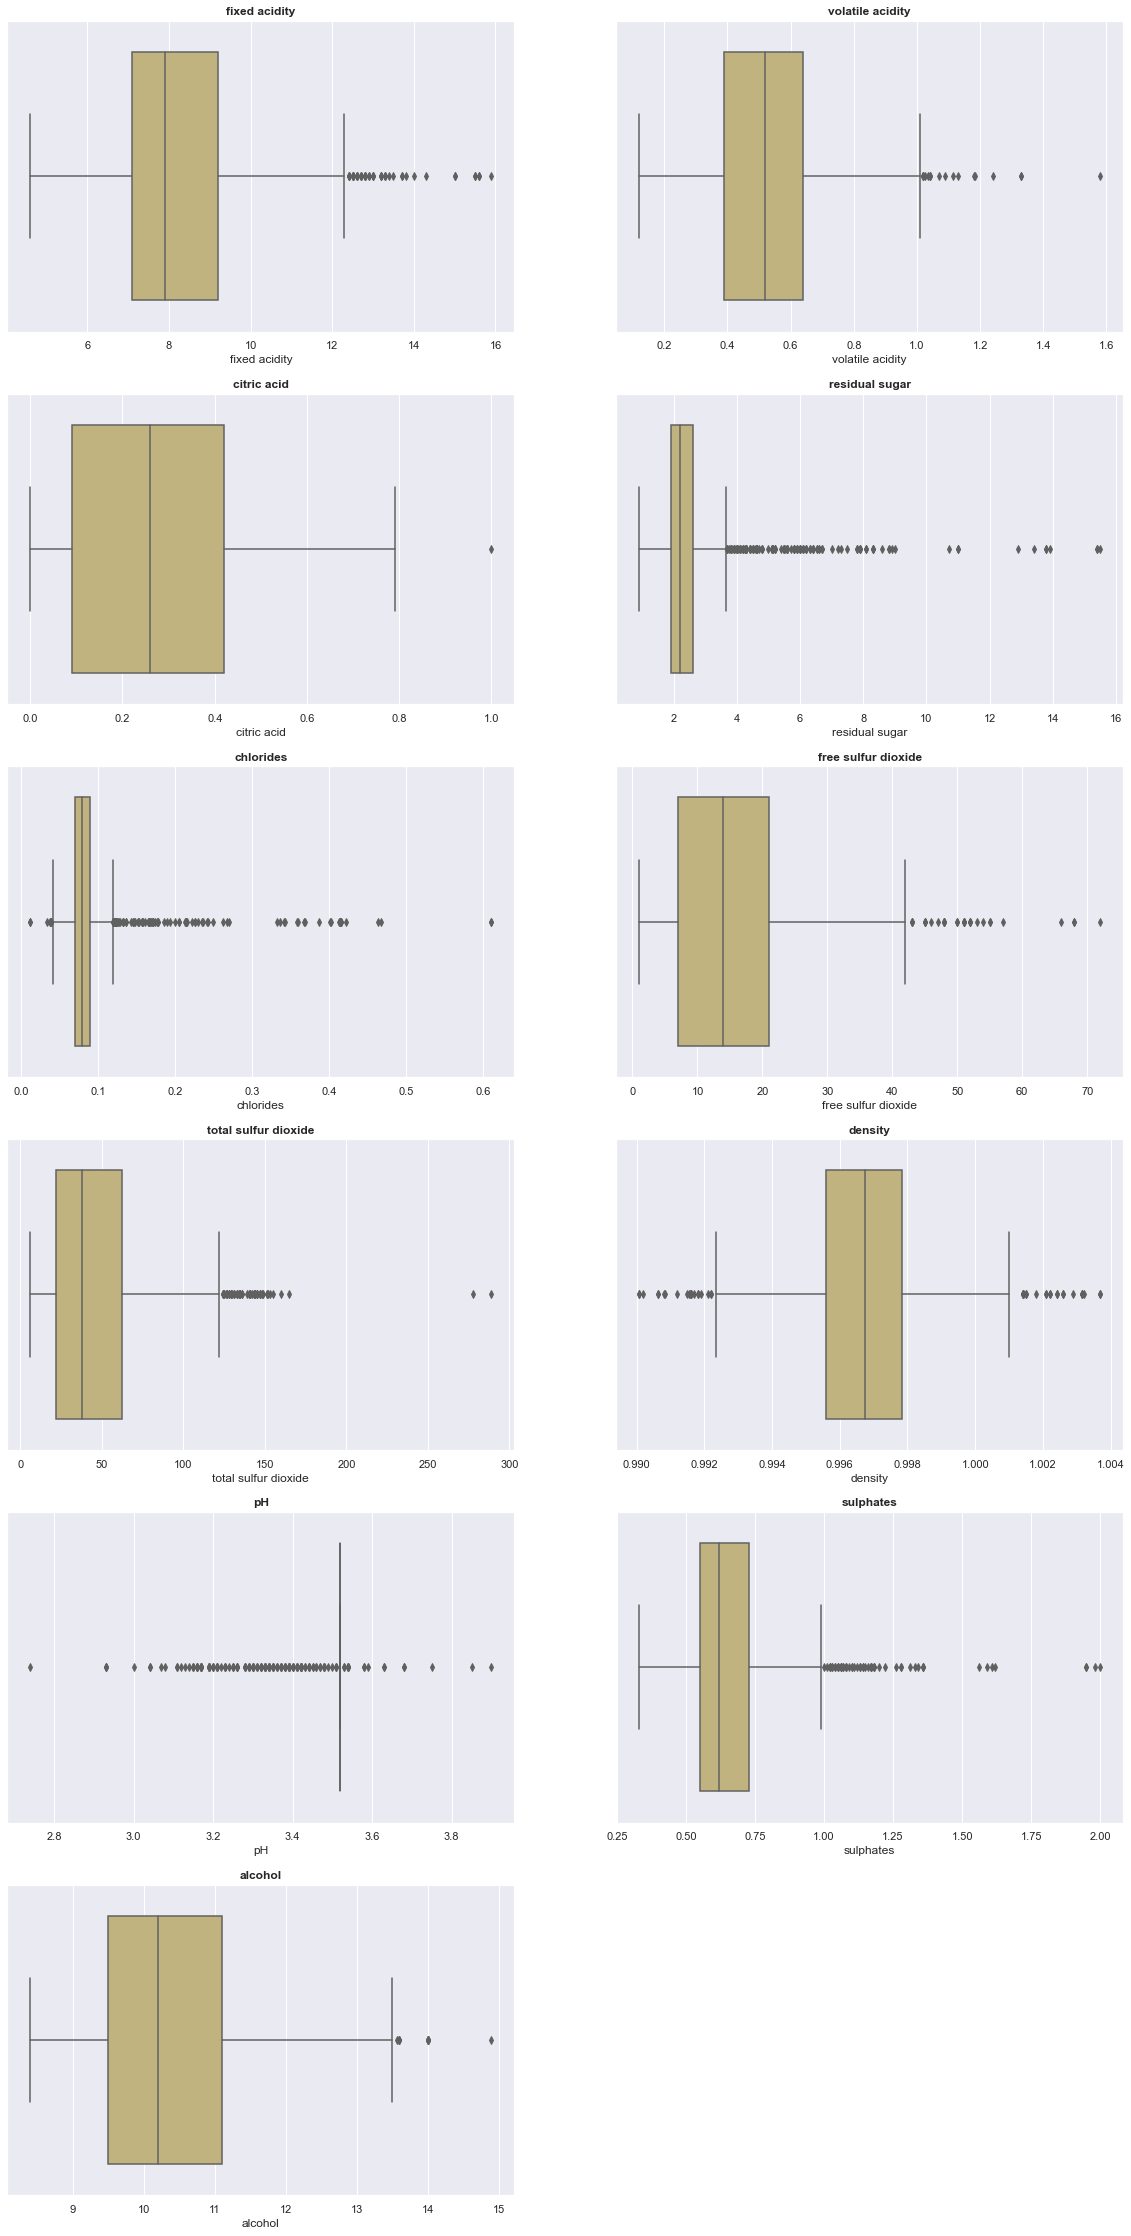

In [163]:
# Checking outliers in numerical features
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=wine, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

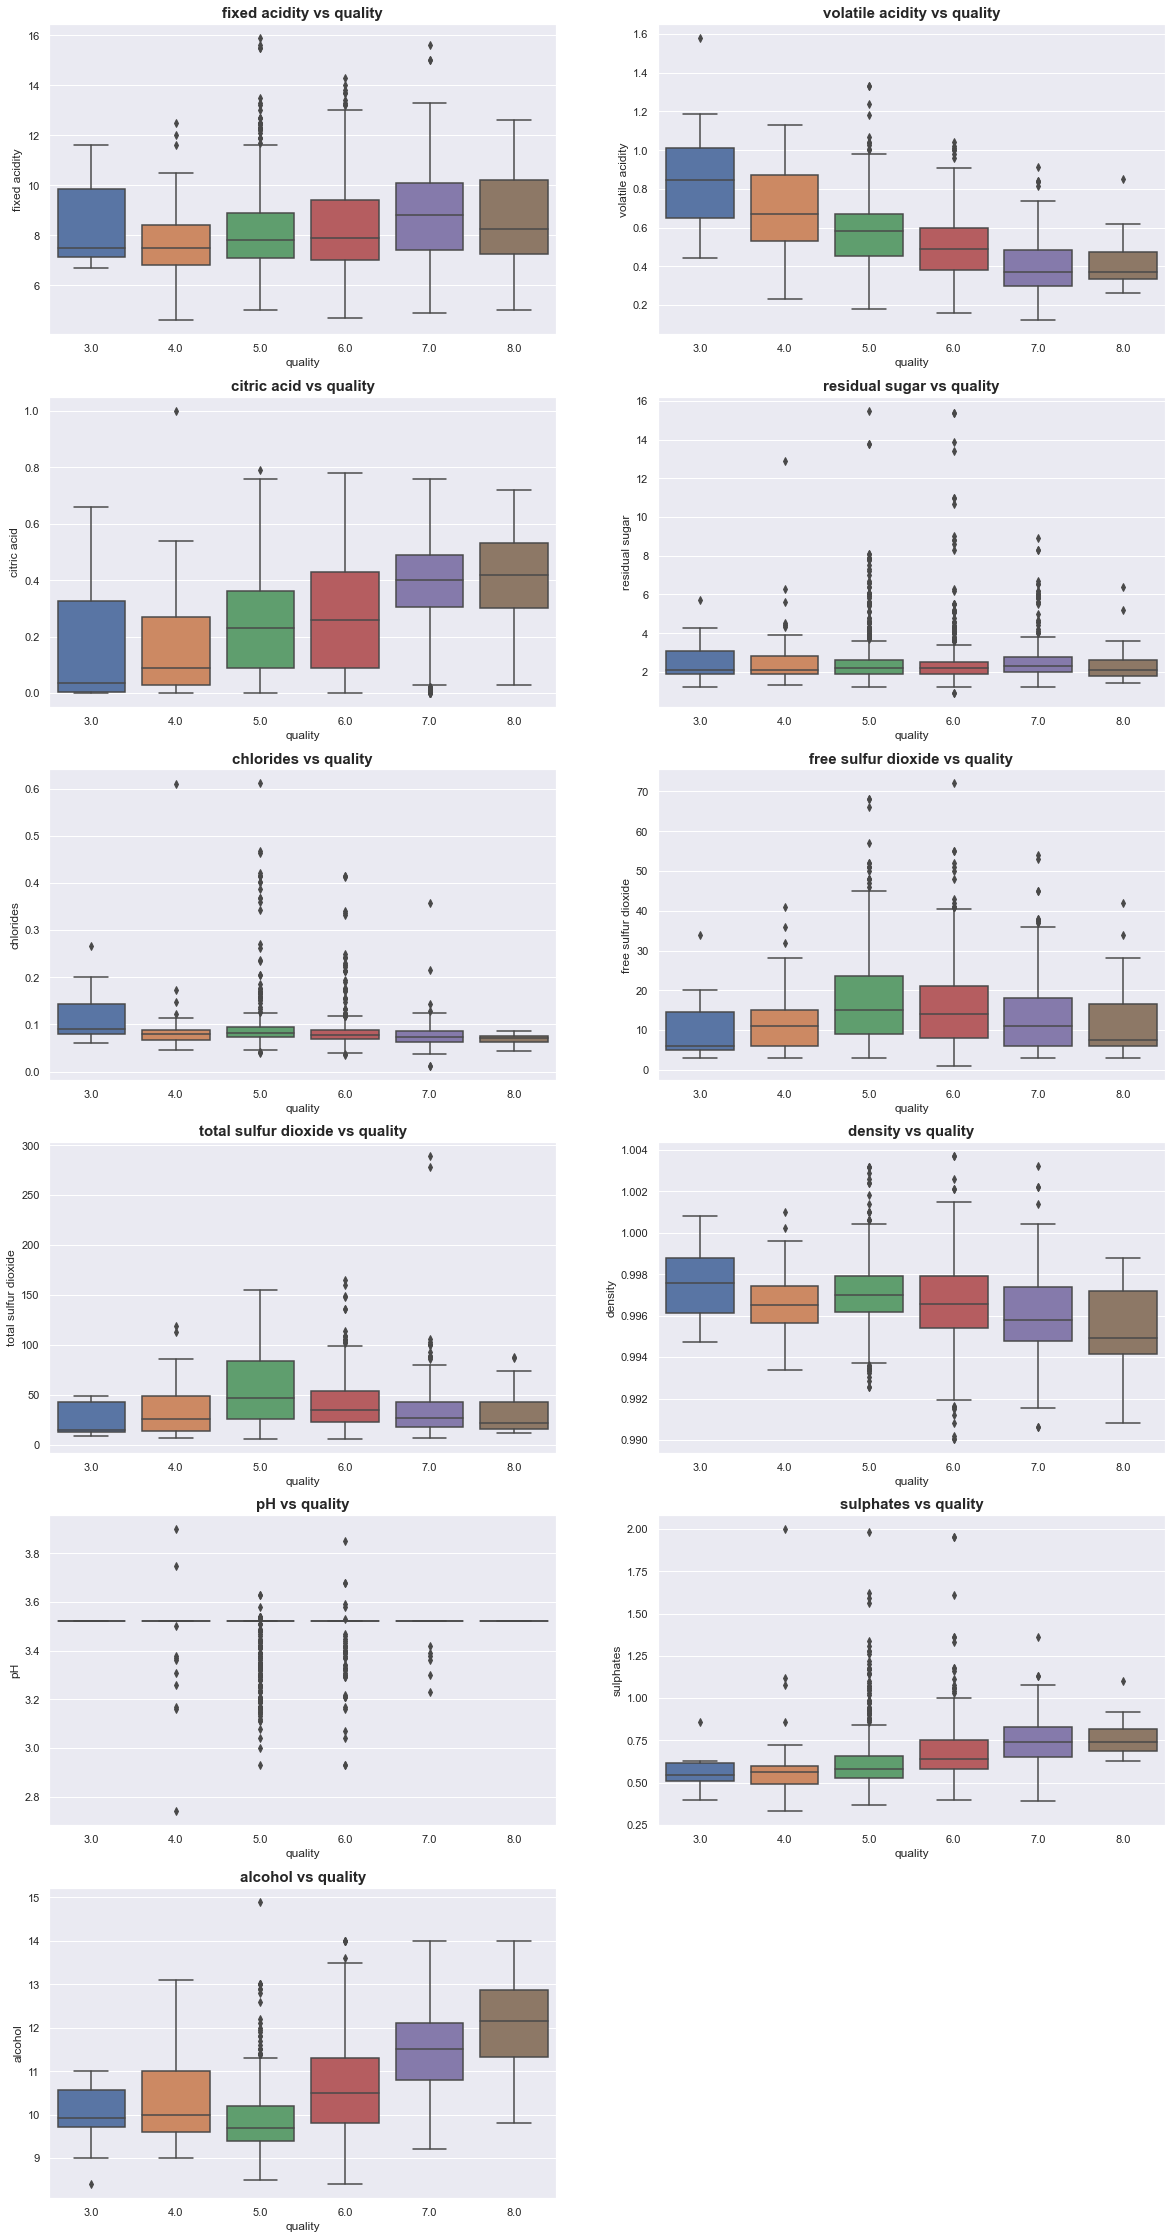

In [164]:
# getting outliers in features for each unique value in quality feature
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=wine, y=i[1], x='quality')
    plt.title("{} vs quality".format(i[1]),fontsize=15, fontweight="bold")

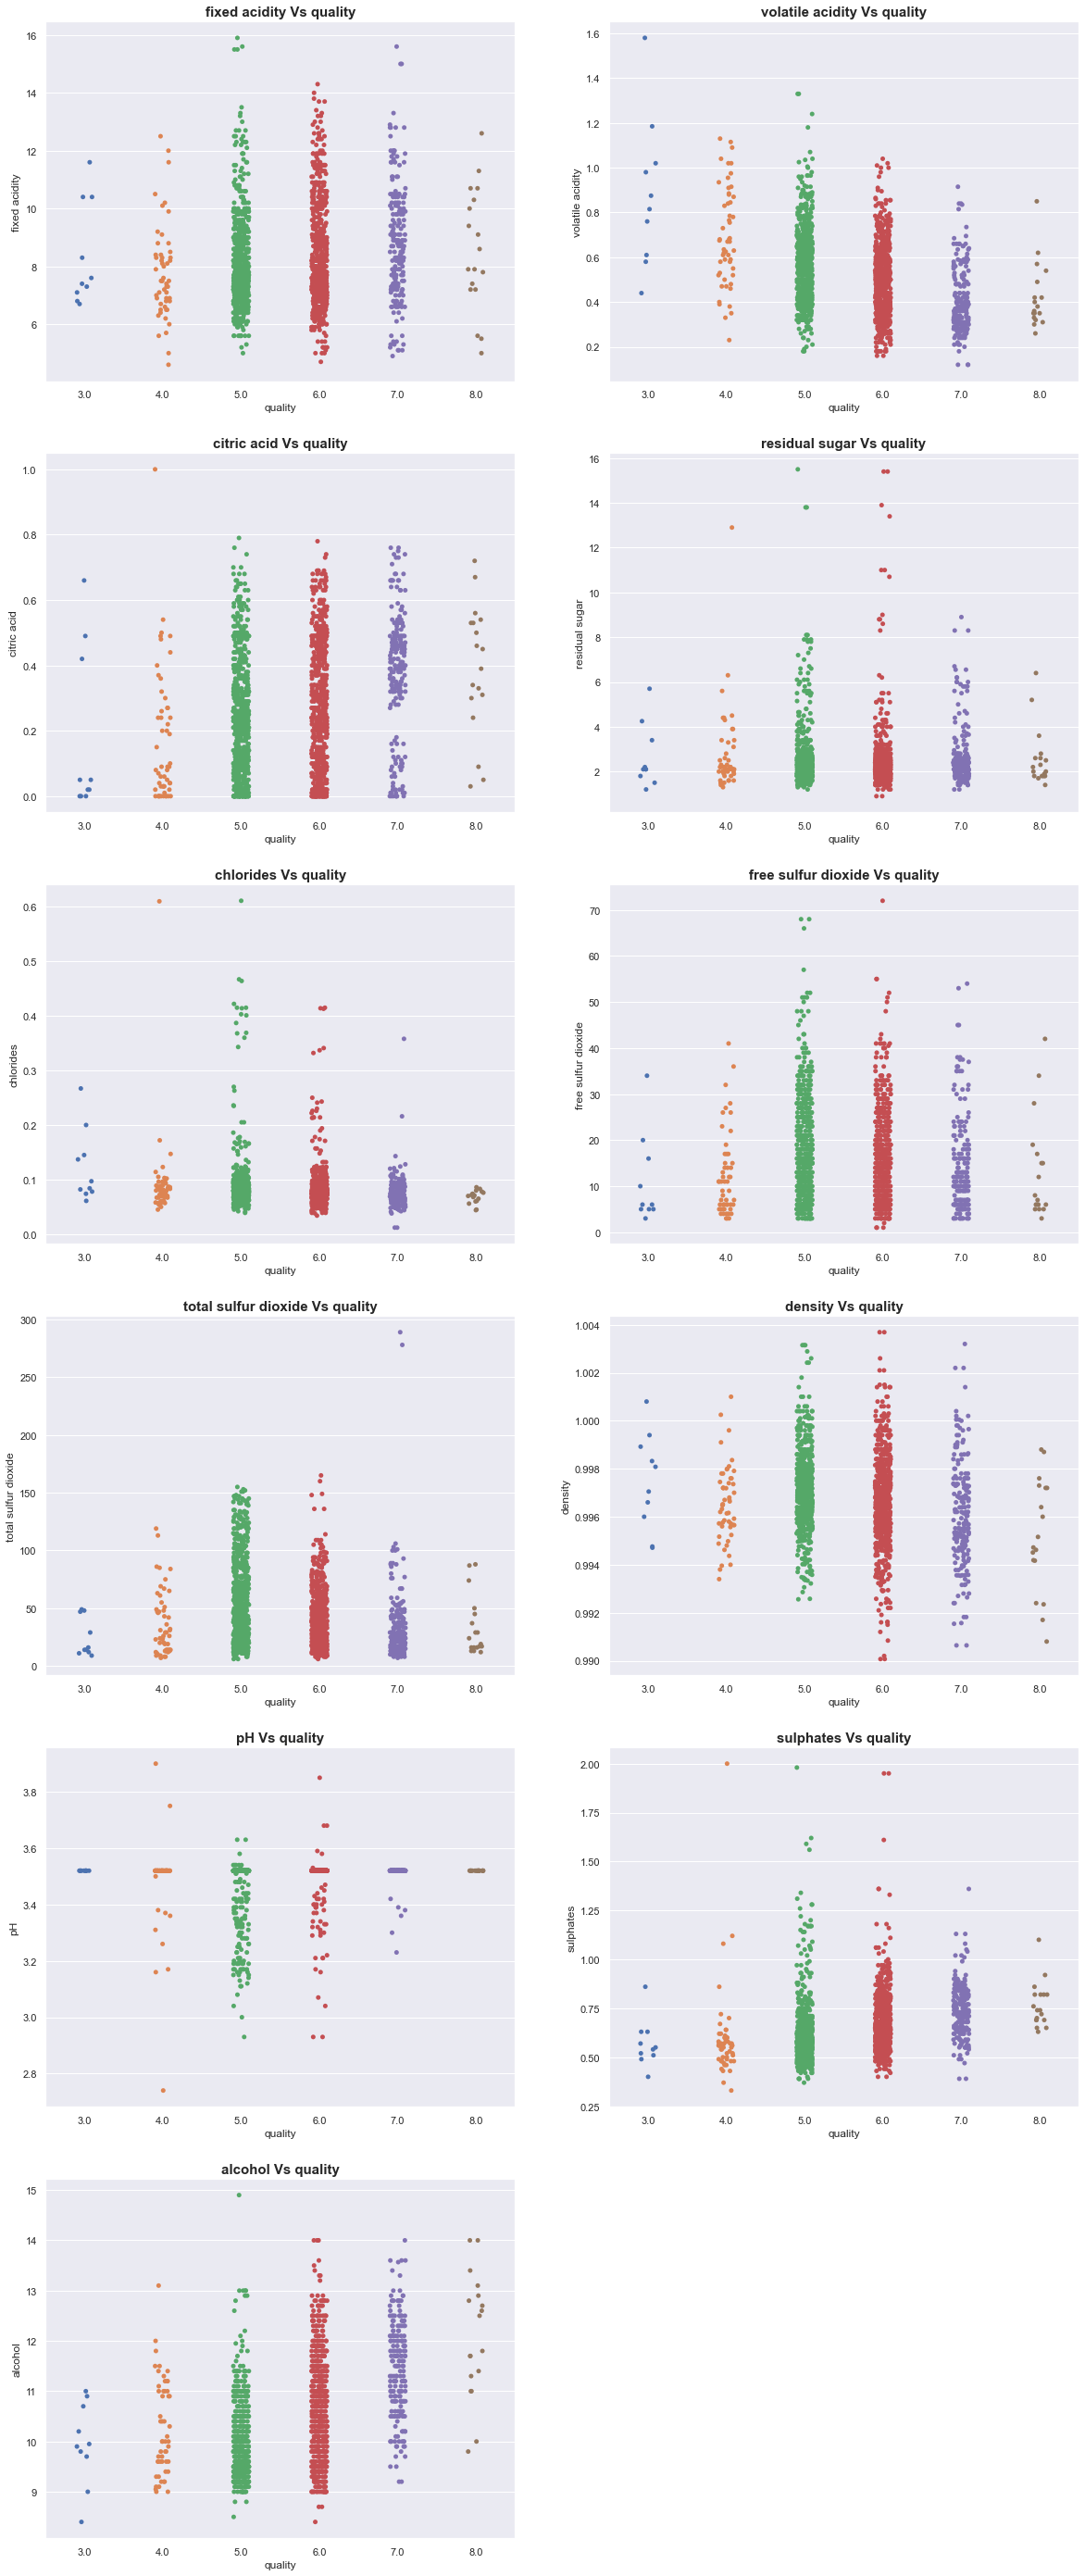

In [165]:
# visualising data scatter in each continuous feature with respect to quality
plt.figure(figsize=(20,50))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=wine, y=i[1], x='quality')
    plt.title("{} Vs quality".format(i[1]),fontsize=15, fontweight="bold")

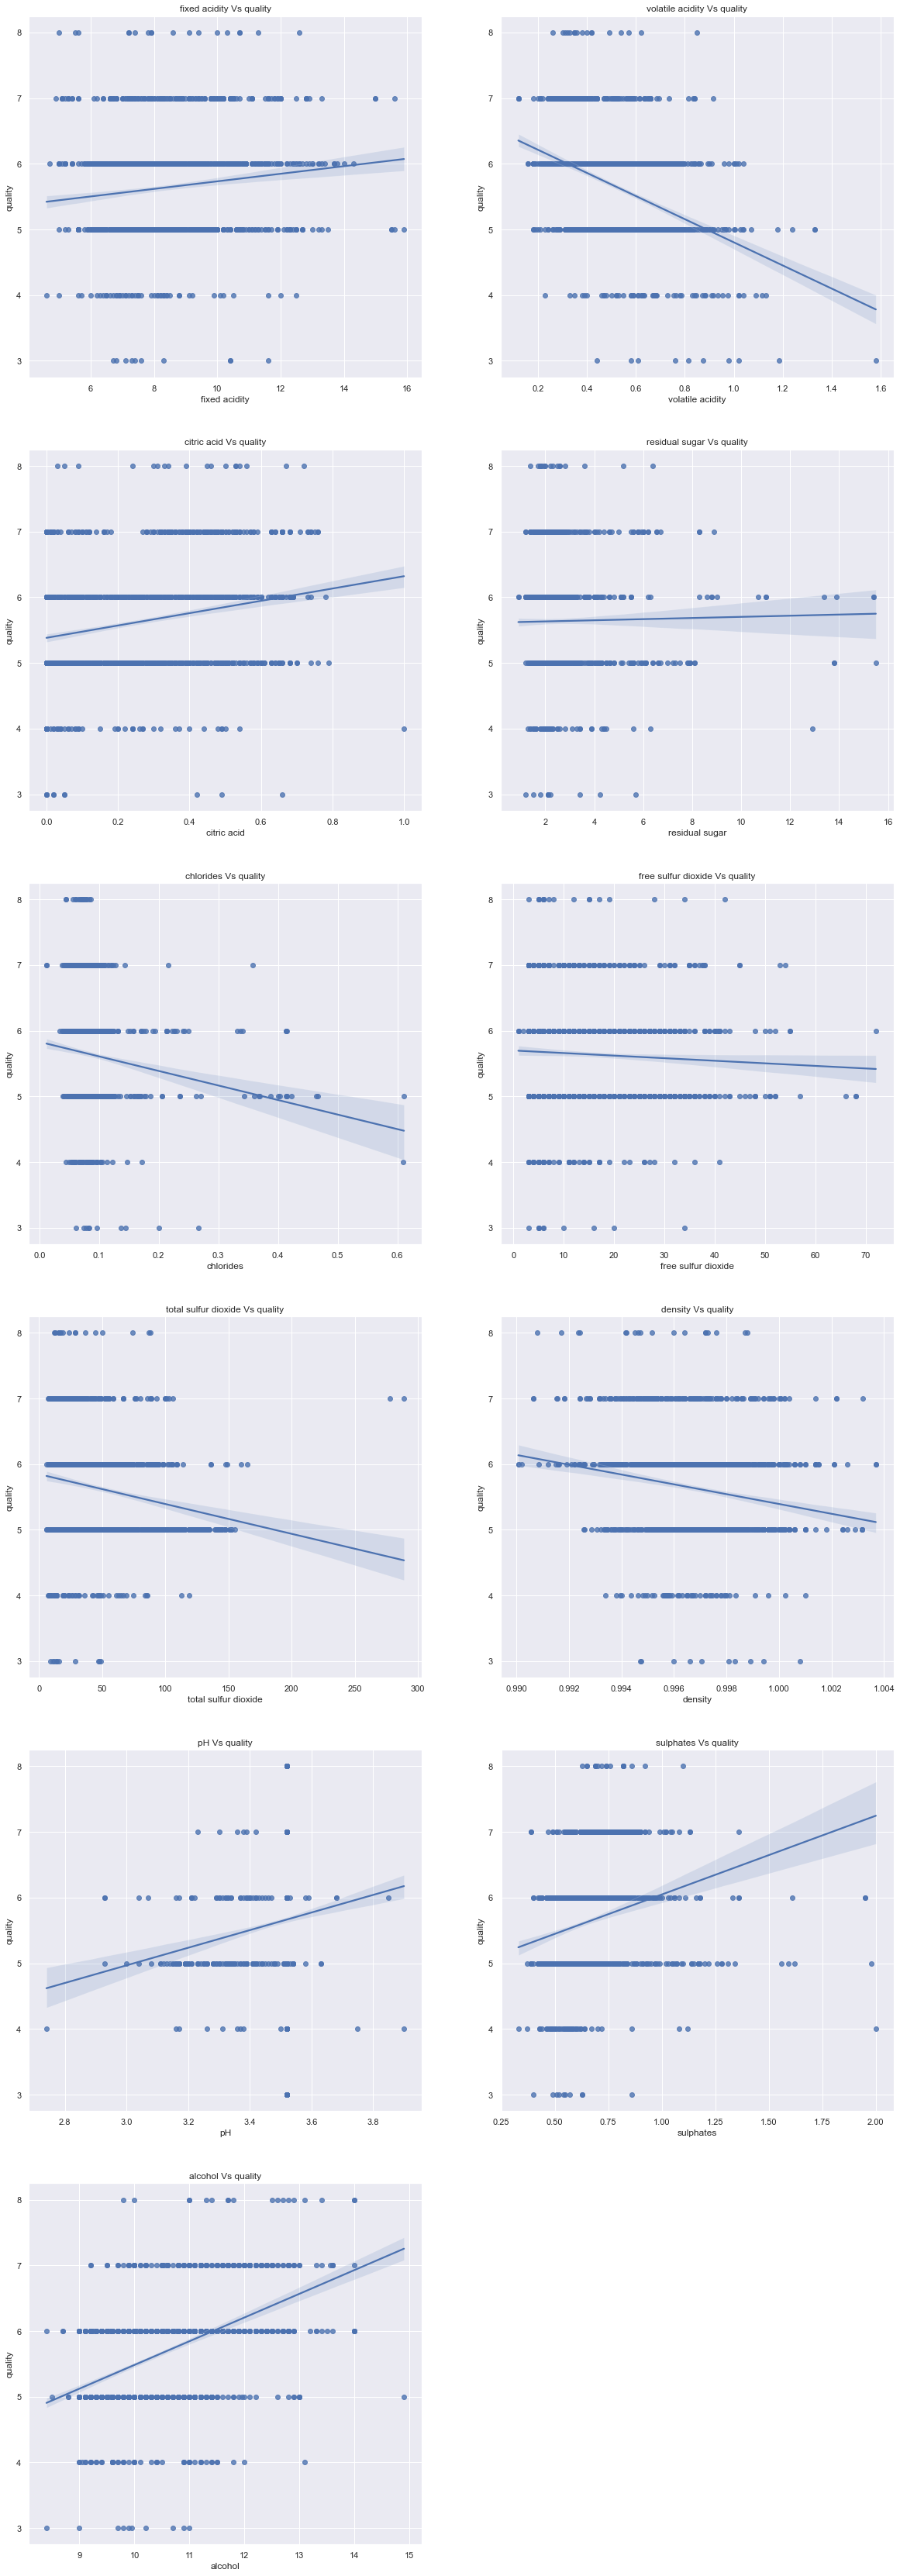

In [166]:
# plotting regplot for features vs quality
plt.figure(figsize=(20,60))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=wine, x=i[1], y='quality')
    plt.xlabel(i[1])
    plt.ylabel("quality")
    plt.title("{} Vs quality".format(i[1]))

# Splitting of Dataset

In [167]:
# splitting data into independent dataframe and dependent series
X=wine.iloc[:,:-1]
y=wine.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [168]:
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

In [169]:
# splitting dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [170]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1200,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.52,0.54,9.8
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.52,0.57,9.5
1511,7.1,0.69,0.04,2.1,0.068,19.0,27.0,0.99712,3.52,0.67,9.8
983,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.52,0.71,10.5
466,10.3,0.50,0.42,2.0,0.069,21.0,51.0,0.99820,3.52,0.72,11.5


In [171]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
858,11.7,0.28,0.47,1.7,0.054,17.0,32.0,0.99686,3.52,0.67,10.6
1560,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,3.52,0.52,9.9
1556,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.52,0.56,9.9
789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.52,0.52,9.3
431,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.52,0.56,9.2


In [172]:
y_train.head()

1200    6.0
741     5.0
1511    5.0
983     6.0
466     6.0
Name: quality, dtype: float64

In [173]:
y_test.head()

858     7.0
1560    5.0
1556    5.0
789     5.0
431     5.0
Name: quality, dtype: float64

In [174]:
# shape of training dataset
X_train.shape,y_train.shape

((1197, 11), (1197,))

In [175]:
# shape of testing dataset
X_test.shape,y_test.shape

((399, 11), (399,))

# Data Transformation

In [176]:
scaler = StandardScaler()
scaler

StandardScaler()

In [177]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-3.71460385e-01,  2.20461393e-01, -3.14732408e-01, ...,
         2.65144649e-01, -6.90665862e-01, -5.68623605e-01],
       [ 4.72575456e-01,  1.34999711e-03, -1.61025883e-01, ...,
         2.65144649e-01, -5.13320055e-01, -8.48845105e-01],
       [-7.09074721e-01,  8.77795580e-01, -1.18573605e+00, ...,
         2.65144649e-01,  7.78326349e-02, -5.68623605e-01],
       ...,
       [ 4.16306400e-01, -1.69676332e+00, -1.61025883e-01, ...,
         2.65144649e-01,  1.26013802e+00, -1.01587772e-01],
       [-3.38460487e-02,  3.84794940e-01, -1.09790375e-01, ...,
         2.65144649e-01, -7.49781131e-01, -5.68623605e-01],
       [-1.38430339e+00, -7.38150964e-01, -7.24616474e-01, ...,
         2.65144649e-01,  7.78326349e-02,  1.85996273e+00]])

In [178]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.87930186, -1.36809623,  1.01739081, ...,  0.26514465,
         0.07783263,  0.17863373],
       [-0.31519133,  0.38479494, -0.05855487, ...,  0.26514465,
        -0.8088964 , -0.47521644],
       [-0.99042   ,  1.91857471, -1.18573605, ...,  0.26514465,
        -0.57243532, -0.47521644],
       ...,
       [ 0.9227279 ,  0.27523924, -0.2634969 , ...,  0.26514465,
        -0.63155059, -0.84884511],
       [-0.25892227, -1.03942913,  0.45380022, ...,  0.26514465,
        -0.69066586,  0.73907673],
       [-1.10295811, -0.87509559, -0.10979037, ...,  0.26514465,
        -0.21774371, -0.56862361]])

# Model Building

Logistic Regression

In [179]:
# applying Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [180]:
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)
log_pred

array([6., 5., 5., 5., 5., 5., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5.,
       5., 6., 6., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6., 5., 5., 6., 6.,
       5., 6., 7., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6., 6.,
       7., 6., 6., 5., 6., 5., 6., 6., 5., 5., 5., 6., 5., 5., 6., 6., 6.,
       6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 6., 6., 6., 3., 6., 5., 5.,
       5., 7., 5., 6., 5., 7., 6., 7., 5., 5., 5., 6., 5., 5., 6., 7., 5.,
       6., 6., 5., 5., 5., 6., 6., 5., 6., 6., 7., 5., 6., 5., 5., 5., 6.,
       6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 5., 6., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 5., 6., 6., 5., 6., 5., 6., 6., 6., 6., 5., 6., 6.,
       5., 5., 5., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 5.,
       5., 6., 5., 6., 6., 6., 5., 5., 5., 5., 6., 6., 6., 7., 6., 5., 5.,
       7., 7., 6., 5., 6., 6., 6., 5., 5., 5., 6., 5., 5., 6., 5., 5., 6.,
       6., 5., 6., 6., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6., 5., 5.,
       5., 6., 6., 5., 6.

In [181]:
report_log = classification_report(y_test, log_pred, zero_division=False)
print(report_log)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.69      0.73      0.71       174
         6.0       0.52      0.66      0.58       151
         7.0       0.74      0.23      0.35        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.60       399
   macro avg       0.32      0.27      0.27       399
weighted avg       0.61      0.60      0.58       399



SVC Model

In [182]:
# Applying SVC algorithm
svc = SVC()
svc

SVC()

In [183]:
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_pred

array([6., 5., 5., 5., 5., 5., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5.,
       5., 6., 6., 6., 5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 6., 6.,
       5., 6., 6., 5., 6., 5., 6., 6., 7., 6., 6., 6., 6., 5., 5., 6., 6.,
       7., 6., 6., 5., 6., 5., 6., 6., 5., 5., 5., 6., 5., 5., 6., 6., 6.,
       6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 5., 5.,
       5., 7., 6., 6., 5., 7., 6., 7., 5., 5., 7., 6., 5., 5., 6., 7., 5.,
       6., 6., 5., 5., 5., 6., 6., 5., 6., 6., 7., 5., 6., 5., 5., 5., 6.,
       7., 6., 6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 5., 6., 7., 6., 5., 5., 6., 6., 6., 7., 5., 5., 6.,
       5., 5., 5., 6., 5., 6., 6., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5.,
       5., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 6., 5., 5.,
       6., 6., 6., 5., 6., 6., 6., 5., 5., 5., 6., 5., 5., 7., 5., 5., 6.,
       6., 5., 6., 6., 6., 5., 5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 5.,
       5., 6., 6., 5., 5.

In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [185]:
confusion_mat = confusion_matrix(y_test, svc_pred)
confusion_mat

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   5,   2,   0,   0],
       [  0,   0, 130,  43,   1,   0],
       [  0,   0,  47, 102,   2,   0],
       [  0,   0,   4,  41,  15,   0],
       [  0,   0,   0,   4,   1,   0]], dtype=int64)

In [186]:
acc = accuracy_score(y_test, svc_pred)
acc

0.6190476190476191

In [187]:
report=classification_report(y_test, svc_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.70      0.75      0.72       174
         6.0       0.53      0.68      0.59       151
         7.0       0.79      0.25      0.38        60
         8.0       0.00      0.00      0.00         5

    accuracy                           0.62       399
   macro avg       0.34      0.28      0.28       399
weighted avg       0.62      0.62      0.60       399



# Hyper-parameter Tuning

In [188]:
# using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    print("For kernel {} model accuracy is {}".format(kernel, model.score(X_test, y_test)))

For kernel linear model accuracy is 0.5764411027568922
For kernel rbf model accuracy is 0.6190476190476191
For kernel poly model accuracy is 0.6040100250626567
For kernel sigmoid model accuracy is 0.47368421052631576


In [189]:
# for polynomial kernel with different degree of polynomial with constant hyper-parameter C
for degree in range(1,11):
    model=SVC(kernel='poly', degree=degree, C=100)
    model.fit(X_train, y_train)
    print("For degree {} modal accuracy is {}".format(degree, model.score(X_test, y_test)))

For degree 1 modal accuracy is 0.5789473684210527
For degree 2 modal accuracy is 0.5538847117794486
For degree 3 modal accuracy is 0.6165413533834586
For degree 4 modal accuracy is 0.5939849624060151
For degree 5 modal accuracy is 0.5839598997493735
For degree 6 modal accuracy is 0.5388471177944862
For degree 7 modal accuracy is 0.5914786967418546
For degree 8 modal accuracy is 0.5162907268170426
For degree 9 modal accuracy is 0.5413533834586466
For degree 10 modal accuracy is 0.5162907268170426


In [190]:
# using gridsearchcv to increase model efficiency by combining above parameters
param_grid={'C':[i for i in range(1,100,10)], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4,5,6,7]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [191]:
# getting best parameters after gridsearchCV
print("Best parameters are {} for optimal accuracy.".format(grid.best_params_))

Best parameters are {'C': 1, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy.


In [192]:
# getting best accuracy after gridsearchCV
print("Best accuracy is {}".format(grid.score(X_test, y_test)))

Best accuracy is 0.6190476190476191
